In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a consistent color palette
colors = ['#3498db', '#e74c3c']  # Blue for 'No', Red for 'Yes' in churn charts
background_color = '#ecf0f1'  # Light gray background

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette(colors)

# Load the dataset
df = pd.read_csv('Customer Churn.csv')

# Display the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
# Data cleaning - Handle TotalCharges column
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")  # Replace space with 0 due to total charges
df["TotalCharges"] = df["TotalCharges"].astype("float")  # Convert the column to floats

# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Check for duplicated rows
df.duplicated().sum()  # For duplication on row basis
#df.isnull().sum().sum()  # Shows the null values

np.int64(0)

In [8]:
# Check for duplicated customer IDs
df["customerID"].duplicated().sum()  # Duplicate check on Unique ID basis

np.int64(0)

In [9]:
# Convert SeniorCitizen to categorical
def conv(value):    # Function for SeniorCitizen to return value in yes or no
    if value == 1:
        return "yes"
    else:
        return "no"
    
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

# Display the updated data
df.head(25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [10]:
# Descriptive statistics
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


C:\Users\Agha\AppData\Local\Temp\ipykernel_21212\3799897653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn', data=df, palette=colors)


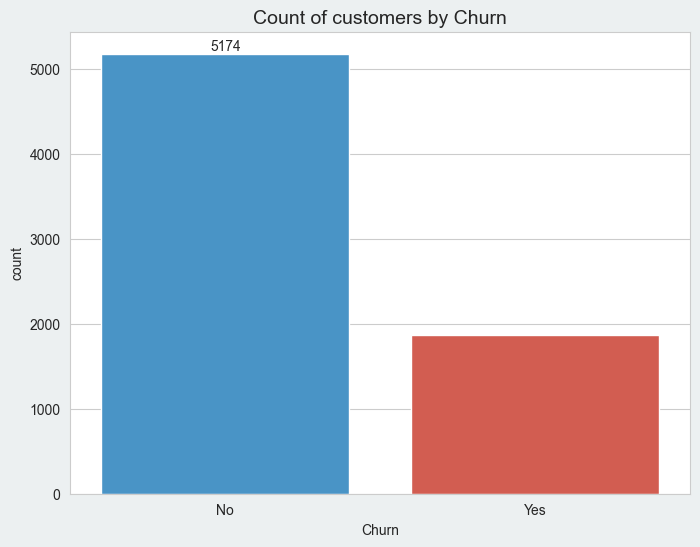

In [11]:
# First visualization - Count of customers by Churn
plt.figure(figsize=(8, 6), facecolor=background_color)
ax = sns.countplot(x='Churn', data=df, palette=colors)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn", fontsize=14)
plt.show()

In [12]:
# Group by Churn for pie chart
gb = df.groupby("Churn").agg({'Churn':"count"})
gb

,Churn
Churn,
No,5174
Yes,1869


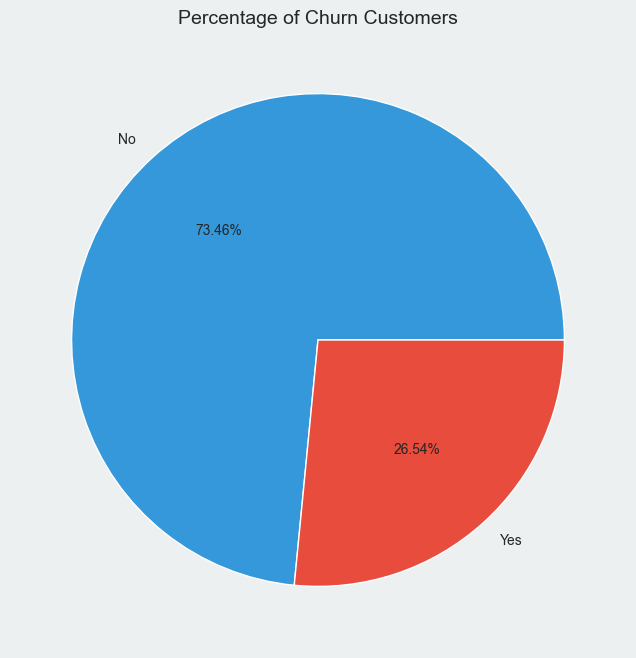

In [13]:
# Second visualization - Percentage of Churn Customers
plt.figure(figsize=(8, 8), facecolor=background_color)
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%", colors=colors)
plt.title("Percentage of Churn Customers", fontsize=14)
plt.show()

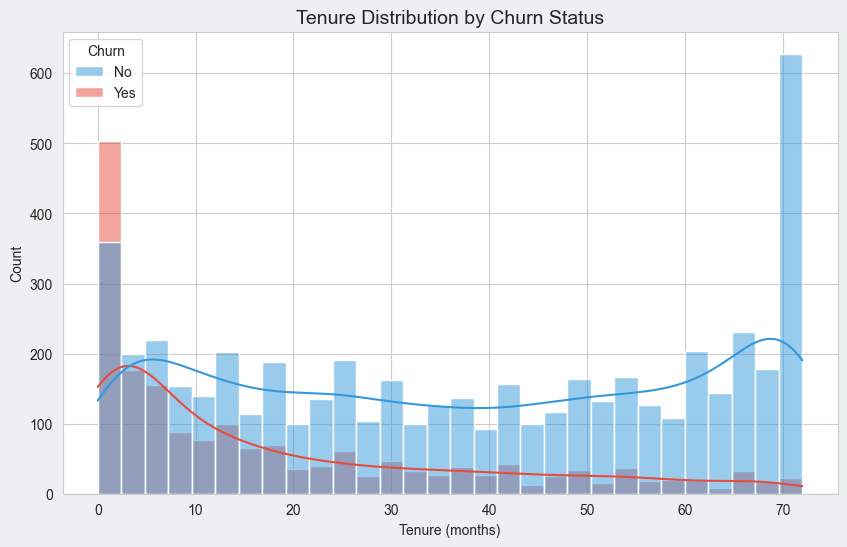

In [14]:
# Additional analysis - Tenure distribution by Churn
plt.figure(figsize=(10, 6), facecolor=background_color)
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, kde=True, palette=colors)
plt.title('Tenure Distribution by Churn Status', fontsize=14)
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.show()

C:\Users\Agha\AppData\Local\Temp\ipykernel_21212\3817833397.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=colors)


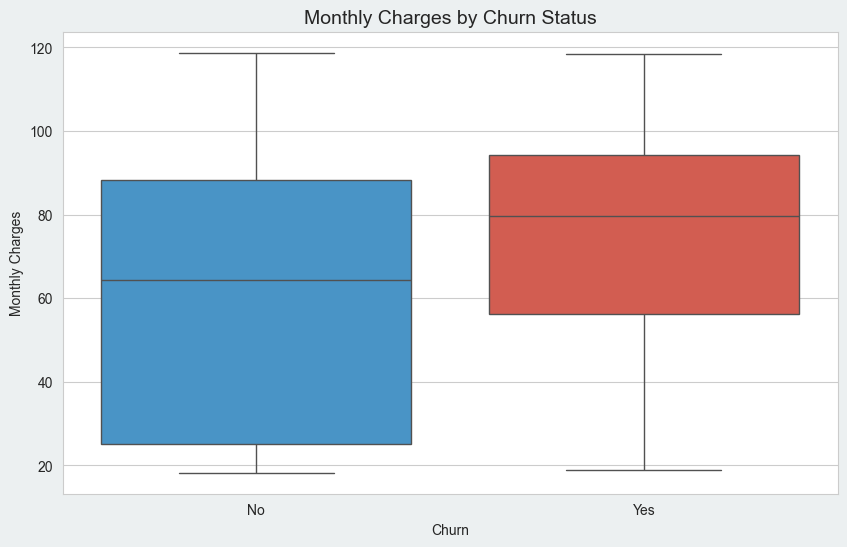

In [15]:
# Monthly Charges distribution by Churn
plt.figure(figsize=(10, 6), facecolor=background_color)
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=colors)
plt.title('Monthly Charges by Churn Status', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

<Figure size 1000x600 with 0 Axes>

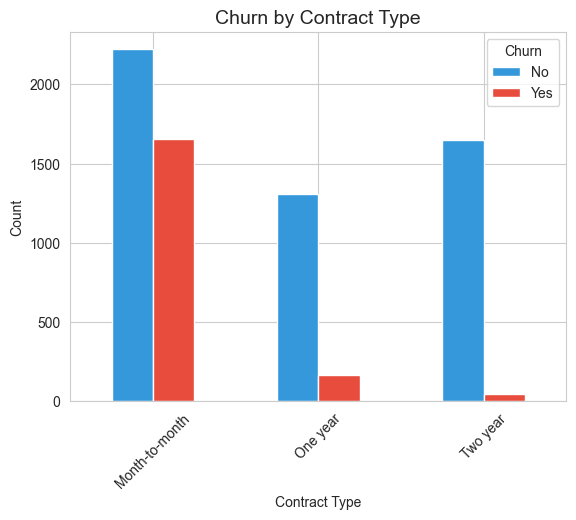

In [16]:
# Contract type analysis
plt.figure(figsize=(10, 6), facecolor=background_color)
contract_churn = pd.crosstab(df['Contract'], df['Churn'])
contract_churn.plot(kind='bar', color=colors)
plt.title('Churn by Contract Type', fontsize=14)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

<Figure size 1000x600 with 0 Axes>

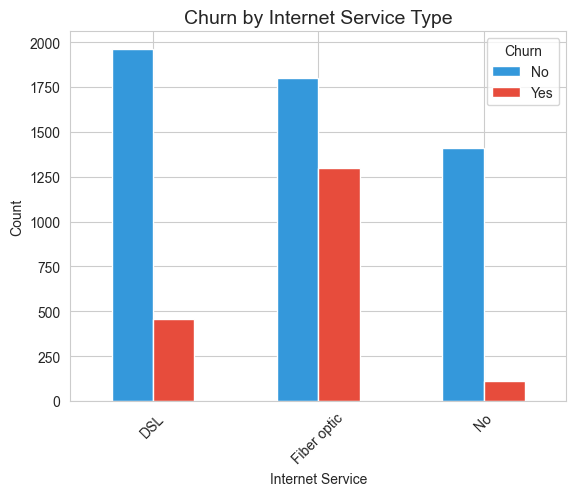

In [17]:
# Internet Service analysis
plt.figure(figsize=(10, 6), facecolor=background_color)
internet_churn = pd.crosstab(df['InternetService'], df['Churn'])
internet_churn.plot(kind='bar', color=colors)
plt.title('Churn by Internet Service Type', fontsize=14)
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

<Figure size 1200x600 with 0 Axes>

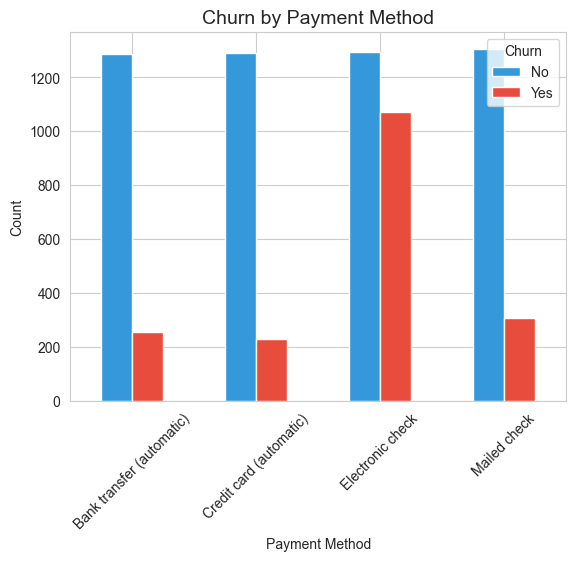

In [18]:
# Payment Method analysis
plt.figure(figsize=(12, 6), facecolor=background_color)
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'])
payment_churn.plot(kind='bar', color=colors)
plt.title('Churn by Payment Method', fontsize=14)
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.show()

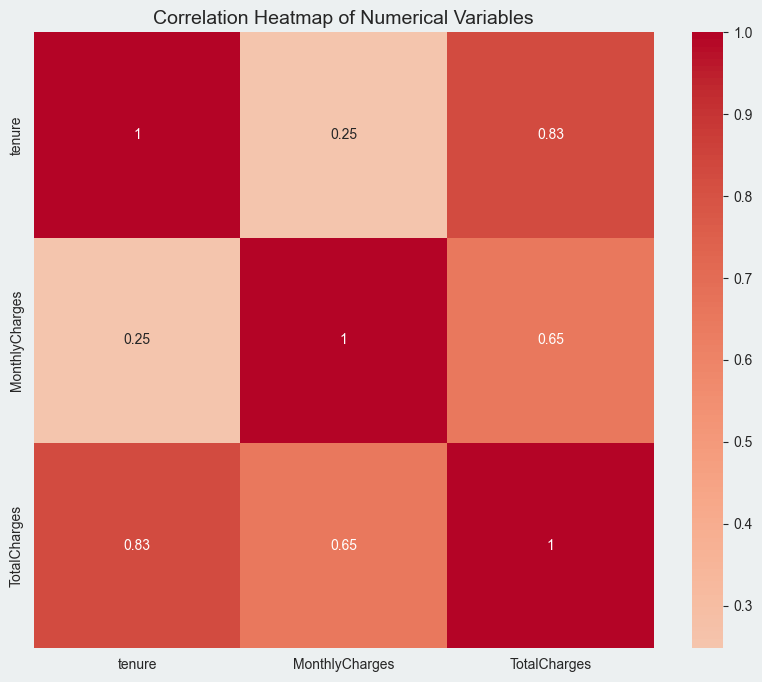

In [19]:
# Correlation heatmap (numerical variables only)
plt.figure(figsize=(10, 8), facecolor=background_color)
numeric_df = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14)
plt.show()

<Figure size 800x600 with 0 Axes>

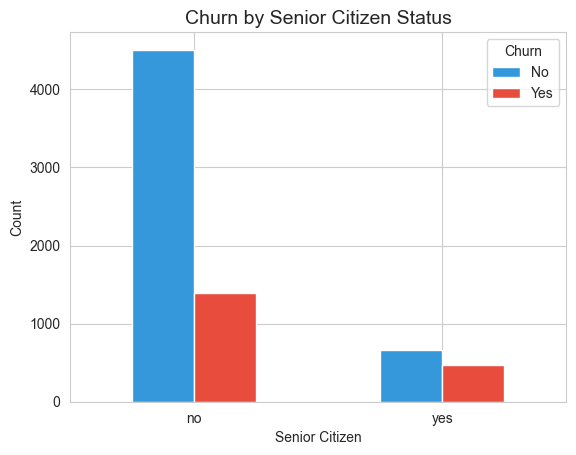

In [20]:
# Senior Citizen analysis
plt.figure(figsize=(8, 6), facecolor=background_color)
senior_churn = pd.crosstab(df['SeniorCitizen'], df['Churn'])
senior_churn.plot(kind='bar', color=colors)
plt.title('Churn by Senior Citizen Status', fontsize=14)
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

<Figure size 800x600 with 0 Axes>

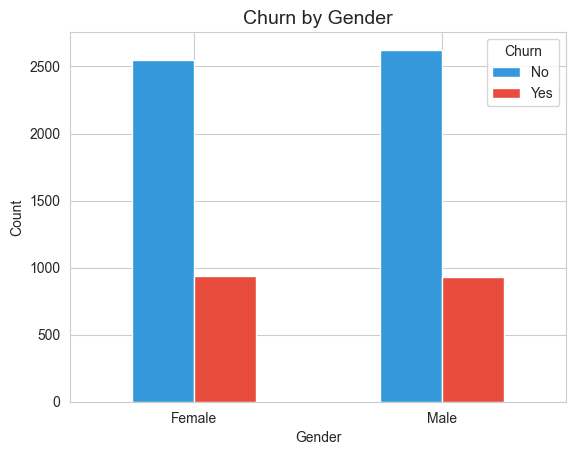

In [21]:
# Gender analysis
plt.figure(figsize=(8, 6), facecolor=background_color)
gender_churn = pd.crosstab(df['gender'], df['Churn'])
gender_churn.plot(kind='bar', color=colors)
plt.title('Churn by Gender', fontsize=14)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.show()

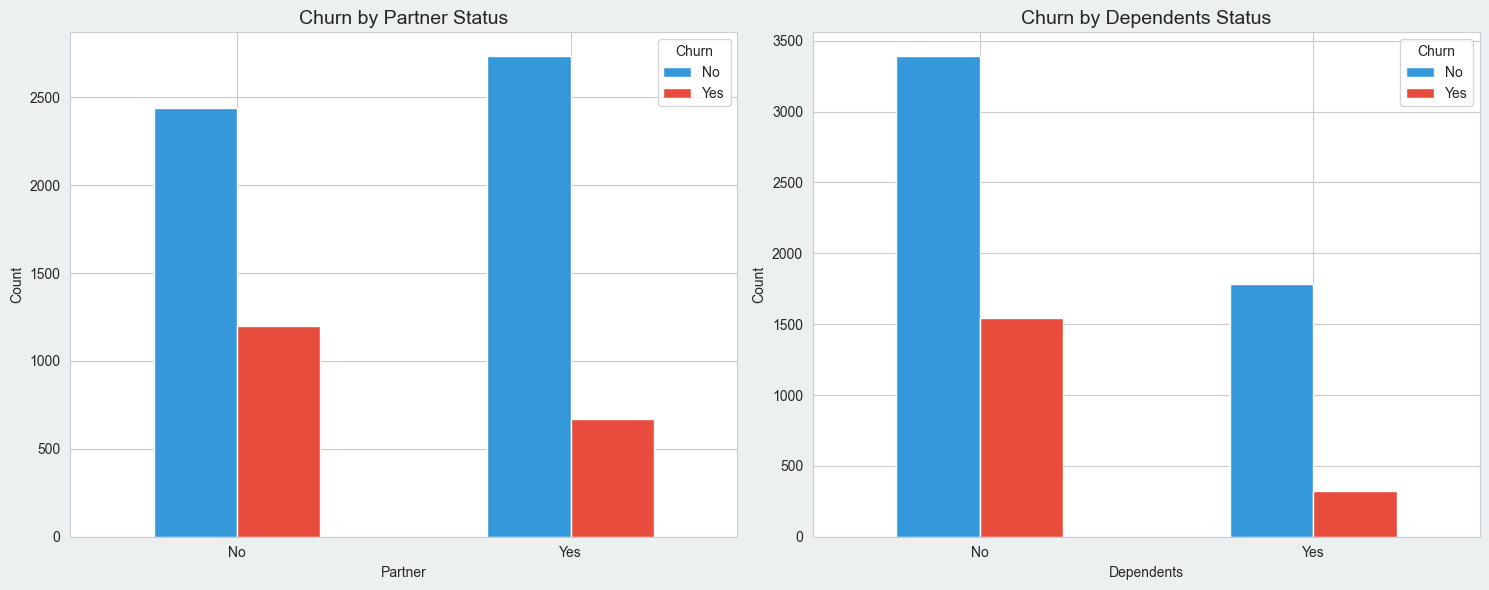

In [22]:
# Partner and Dependents analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), facecolor=background_color)

# Partner
partner_churn = pd.crosstab(df['Partner'], df['Churn'])
partner_churn.plot(kind='bar', color=colors, ax=ax1)
ax1.set_title('Churn by Partner Status', fontsize=14)
ax1.set_xlabel('Partner')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)
ax1.legend(title='Churn')

# Dependents
dependents_churn = pd.crosstab(df['Dependents'], df['Churn'])
dependents_churn.plot(kind='bar', color=colors, ax=ax2)
ax2.set_title('Churn by Dependents Status', fontsize=14)
ax2.set_xlabel('Dependents')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=0)
ax2.legend(title='Churn')

plt.tight_layout()
plt.show()

In [23]:
# Final summary - Churn rate by various factors
print("Overall Churn Rate: {:.2f}%".format((df['Churn'] == 'Yes').sum() / len(df) * 100))
print("\nChurn Rate by Contract Type:")
for contract in df['Contract'].unique():
    subset = df[df['Contract'] == contract]
    churn_rate = (subset['Churn'] == 'Yes').sum() / len(subset) * 100
    print(f"{contract}: {churn_rate:.2f}%")

print("\nChurn Rate by Internet Service:")
for service in df['InternetService'].unique():
    subset = df[df['InternetService'] == service]
    churn_rate = (subset['Churn'] == 'Yes').sum() / len(subset) * 100
    print(f"{service}: {churn_rate:.2f}%")

Overall Churn Rate: 26.54%

Churn Rate by Contract Type:
Month-to-month: 42.71%
One year: 11.27%
Two year: 2.83%

Churn Rate by Internet Service:
DSL: 18.96%
Fiber optic: 41.89%
No: 7.40%
